In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logs = pd.read_csv("driving_log.csv")

In [3]:
logs.head(5)

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [4]:
logs['rounded_steering']= np.around(logs['steering'],2)

In [5]:
max_steering_angle = logs['steering'].max()
min_steering_angle = logs['steering'].min()

print('Maximum steering angle = {:.3f}'.format(max_steering_angle))
print('Minimum steering angle = {:.3f}'.format(min_steering_angle))

Maximum steering angle = 1.000
Minimum steering angle = -0.943


Text(0.5,1,'Steering angle value distribution')

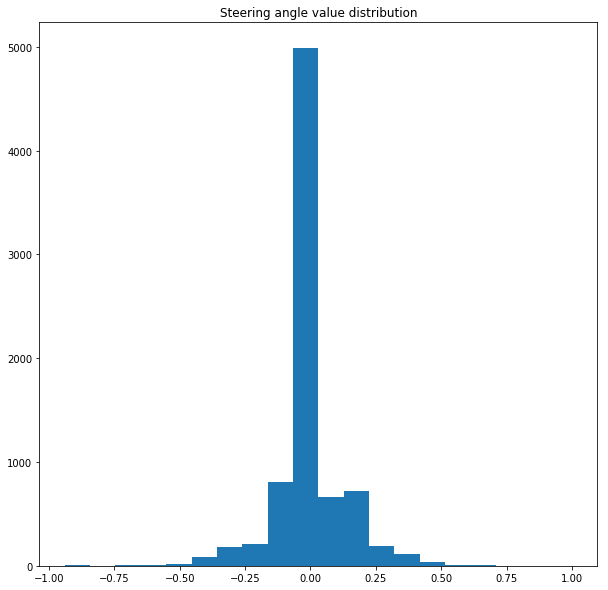

In [6]:
steering_angle_array = np.array(logs['rounded_steering'])
plt.figure(figsize=(10,10))
plt.hist(steering_angle_array, bins=20)
plt.title("Steering angle value distribution")

In [7]:
logs=logs.drop(columns=['throttle','brake','speed'])

In [8]:
len(logs)*3

24108

In [9]:

def convert_to_three_camera_mode(logs, angle_correction = 0.25):
    
    columns =['image','steering_angle']
    df_steering = pd.DataFrame(np.zeros((len(logs)*3, 2)),columns=columns)
    
    for i in range(0,len(logs)):
        
        df_steering.loc[3*i,'image'] = logs.loc[i,'center']
        df_steering.loc[3*i+1,'image'] = logs.loc[i,'left'] 
        df_steering.loc[3*i+2,'image'] = logs.loc[i,'right']
        
        df_steering.loc[3*i,'steering_angle'] = logs.loc[i,'steering']
        df_steering.loc[3*i+1,'steering_angle'] = logs.loc[i,'steering'] + angle_correction
        df_steering.loc[3*i+2,'steering_angle'] = logs.loc[i,'steering'] - angle_correction
        
    return df_steering
    

In [10]:
logs.tail(3)

,center,left,right,steering,rounded_steering
8033,IMG/center_2016_12_01_13_46_38_846.jpg,IMG/left_2016_12_01_13_46_38_846.jpg,IMG/right_2016_12_01_13_46_38_846.jpg,0.0,0.0
8034,IMG/center_2016_12_01_13_46_38_922.jpg,IMG/left_2016_12_01_13_46_38_922.jpg,IMG/right_2016_12_01_13_46_38_922.jpg,0.0,0.0
8035,IMG/center_2016_12_01_13_46_38_947.jpg,IMG/left_2016_12_01_13_46_38_947.jpg,IMG/right_2016_12_01_13_46_38_947.jpg,0.0,0.0


In [11]:
df_3_cameras = convert_to_three_camera_mode(logs)

In [12]:
df_3_cameras['steering_angle_rounded'] = np.around(df_3_cameras['steering_angle'],2)

In [13]:
steering_angle_3_cameras = np.array(df_3_cameras['steering_angle_rounded'])

Text(0.5,1,'Steering angle value distribution')

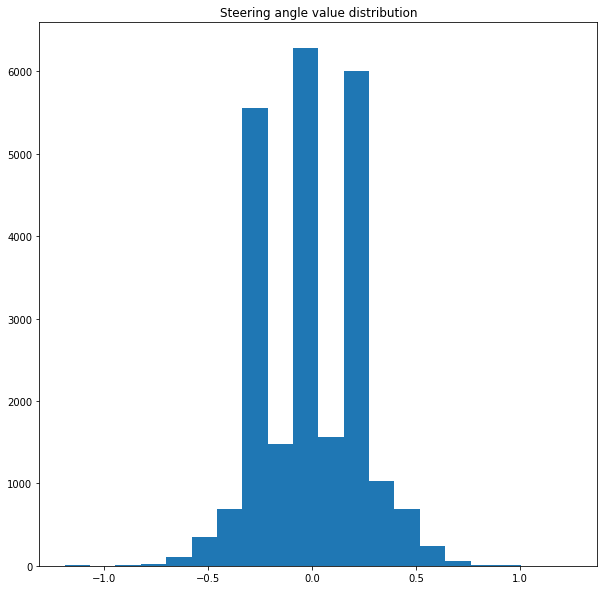

In [14]:
plt.figure(figsize=(10,10))
plt.hist(steering_angle_3_cameras,bins=20)
plt.title("Steering angle value distribution")

### Augmentation

Offline augmentation is performed in this step with the aim to balance the data step, since large steering angles are observed to be minimal in this dataset

In [15]:
from imgaug import augmenters as iaa
import cv2

In [16]:
flip = iaa.Fliplr(1.0)

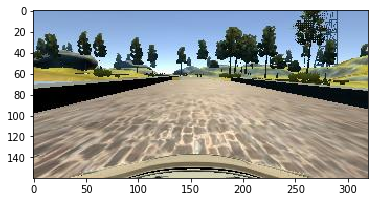

In [17]:
image = str(df_3_cameras.loc[0,'image']).strip()
img = cv2.imread(image)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
flipped_img = flip.augment_image(img)

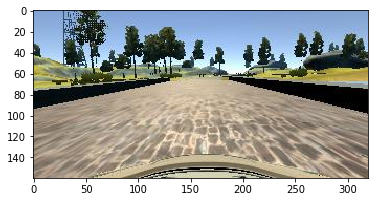

In [19]:
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))

In [18]:
img.shape

(160, 320, 3)

In [20]:
additive_gaussian_noise = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)

In [21]:
noisy_img = additive_gaussian_noise.augment_image(img)

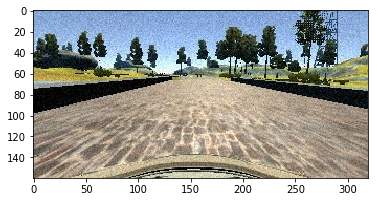

In [22]:
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))

In [23]:
translate = iaa.Affine(translate_percent={"x": 0.2})

In [24]:
translated_img = translate.augment_image(img)

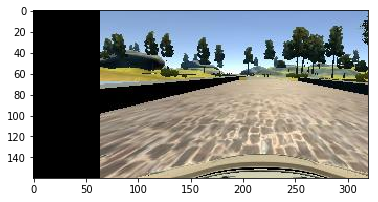

In [25]:
plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB))

In [26]:
invert = iaa.Invert(1.0)

In [27]:
inverted_img = invert.augment_image(img)

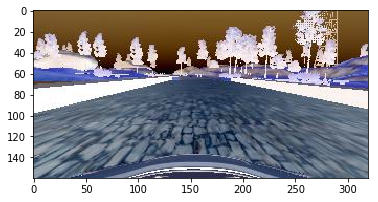

In [28]:
plt.imshow(cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB))

In [29]:
bright_dark = iaa.Multiply((0.5, 1.5), per_channel=0.5)

In [30]:
brightned_img = bright_dark.augment_image(img)

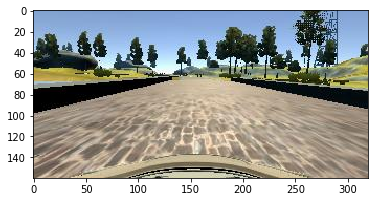

In [31]:
plt.imshow(cv2.cvtColor(brightned_img, cv2.COLOR_BGR2RGB))

In [32]:
new_image = "flipped" + "_" + str(df_3_cameras.loc[0,'image'])

In [33]:
print(new_image)

flipped_IMG/center_2016_12_01_13_30_48_287.jpg


In [34]:
new_name = str(df_3_cameras.loc[0,'image']).strip('jpg').strip('.') + "_" + "flipped" + "." + "jpg"
print(new_name)

IMG/center_2016_12_01_13_30_48_287_flipped.jpg


In [35]:
cv2.imwrite(new_name,flipped_img)

True

In [36]:
name = 'haymodea.jpg'
name.strip('jpg')

'haymodea.'

In [37]:
#df_3_cameras.append(pd.DataFrame({"image":['blablabla'],"steering_angle":[0.0],"steering_angle_rounded":[0.0]}), ignore_index = True)

In [86]:
def flip_images(df_input,df_original):
    
    flip = iaa.Fliplr(1.0)
    
    for i in range(len(df_input)):
        
        index = df_input.index[i]
        
        print(index)
        
        image = str(df_input.loc[index,'image']).strip()
        img = cv2.imread(image)
        
        if i % 100 ==0:
            plt.imshow(img)
    
        flipped_img = flip.augment_image(img)
        updated_angle = - df_input.loc[index,'steering_angle']
        rounded_angle = np.around(updated_angle,2)
        
        
        saved_name = str(df_input.loc[index,'image']).strip().strip('jpg').strip('.') + "_" + "flipped" + "." + "jpg"
        df_original = df_original.append(pd.DataFrame({"image":[saved_name],"steering_angle":[updated_angle],"steering_angle_rounded":[rounded_angle]}), ignore_index = True)
        cv2.imwrite(saved_name,flipped_img)
        
    return df_original
        
    

In [83]:
df_large_steering_angles = df_3_cameras[np.absolute(df_3_cameras['steering_angle_rounded']) > 0.25]
df_large_steering_angles.tail(2)

,image,steering_angle,steering_angle_rounded
23739,IMG/center_2016_12_01_13_46_29_398.jpg,-0.297116,-0.30
23741,IMG/right_2016_12_01_13_46_29_398.jpg,-0.547116,-0.55


In [69]:
df_trial = df_large_steering_angles.iloc[:2,:]
len(df_trial)

2

In [70]:
df_trial.head(3)

,image,steering_angle,steering_angle_rounded
154,IMG/left_2016_12_01_13_32_43_457.jpg,0.311760,0.31
157,IMG/left_2016_12_01_13_32_43_558.jpg,0.302191,0.30


In [71]:
4250 *4 + 24108

41108

In [72]:
len(df_3_cameras)

24108

In [73]:
df_new = flip_images(df_trial,df_3_cameras)
len(df_new)

 IMG/left_2016_12_01_13_32_43_457_new.jpg
 IMG/left_2016_12_01_13_32_43_558_new.jpg


24110

154
157
160
162
163
165
166
167
168
169
170
172
208
211
214
217
220
223
236
239
242
245
259
262
265
267
268
270
271
274
293
296
299
302
305
308
311
314
317
320
323
326
334
337
340
391
394
397
400
419
422
425
428
431
439
442
445
448
451
461
462
464
465
467
468
470
478
481
484
487
490
492
493
495
496
498
499
521
524
527
530
533
553
556
559
562
564
565
567
568
571
578
581
584
587
590
616
619
622
625
628
631
634
637
691
694
697
700
703
706
709
712
715
733
736
739
742
745
748
751
781
784
787
790
793
796
799
802
805
808
811
814
817
820
823
826
829
832
835
838
883
886
889
892
895
898
901
931
934
937
940
943
946
949
952
955
958
961
1030
1033
1068
1069
1071
1072
1074
1075
1078
1106
1109
1112
1115
1135
1138
1141
1177
1180
1183
1186
1189
1250
1253
1256
1259
1262
1285
1288
1291
1294
1297
1390
1393
1396
1399
1465
1468
1471
1474
1477
1480
1483
1505
1508
1519
1522
1525
1600
1603
1606
1609
1612
1615
1618
1621
1624
1627
1629
1630
1632
1633
1636
1655
1658
1661
1681
1684
1687
1705
1707
1708
1710
1711
171

10084
10086
10087
10089
10090
10092
10093
10095
10096
10099
10126
10129
10132
10134
10135
10137
10138
10140
10141
10144
10162
10165
10168
10171
10174
10177
10180
10183
10186
10189
10226
10229
10232
10235
10238
10255
10258
10261
10264
10277
10280
10283
10286
10289
10292
10295
10298
10302
10303
10304
10306
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10325
10326
10327
10329
10330
10332
10333
10335
10336
10339
10346
10358
10359
10360
10361
10364
10374
10375
10377
10378
10381
10433
10436
10439
10442
10445
10448
10555
10558
10561
10563
10564
10567
10570
10635
10636
10638
10639
10641
10642
10652
10655
10658
10661
10662
10664
10665
10667
10668
10670
10673
10676
10695
10696
10698
10699
10791
10792
10794
10795
10796
10812
10813
10843
10845
10846
10848
10849
10851
10852
10879
10882
10890
10891
10893
10894
10906
10908
10909
10910
10912
10929
10930
10932
10933
10948
10951
10954
10957
10960
10963
10966
10969
10972
10975
10978
10981
10984
10987
10990
10993
10996
10999
11002
1100

17768
17771
17789
17792
17795
17798
17801
17804
17807
17810
17813
17816
17819
17822
17825
17828
17831
17834
17837
17840
17843
17846
17849
17879
17882
17885
17888
17891
17894
17897
17900
17903
17906
17909
17912
17915
17918
17921
17924
17927
17930
17933
17984
17987
17990
17993
17996
17999
18035
18038
18041
18044
18047
18050
18053
18074
18077
18080
18083
18086
18089
18119
18122
18125
18128
18131
18166
18169
18172
18175
18178
18181
18193
18196
18210
18212
18213
18215
18216
18218
18223
18225
18226
18228
18229
18231
18232
18239
18240
18242
18243
18245
18246
18248
18251
18256
18274
18277
18371
18374
18377
18380
18383
18386
18389
18392
18395
18398
18401
18404
18407
18430
18433
18436
18439
18458
18461
18464
18467
18470
18473
18476
18477
18479
18480
18482
18483
18485
18486
18488
18489
18491
18492
18494
18495
18497
18498
18500
18503
18527
18530
18533
18536
18537
18539
18540
18542
18543
18545
18546
18548
18549
18551
18552
18554
18555
18557
18558
18560
18561
18563
18564
18566
18567
18569
18572
1857

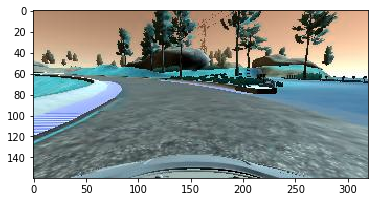

In [87]:
df_with_flipped_images = flip_images(df_large_steering_angles,df_3_cameras)

In [42]:
len(df_with_flipped_images)

28358

Text(0.5,1,'Steering angle value distribution')

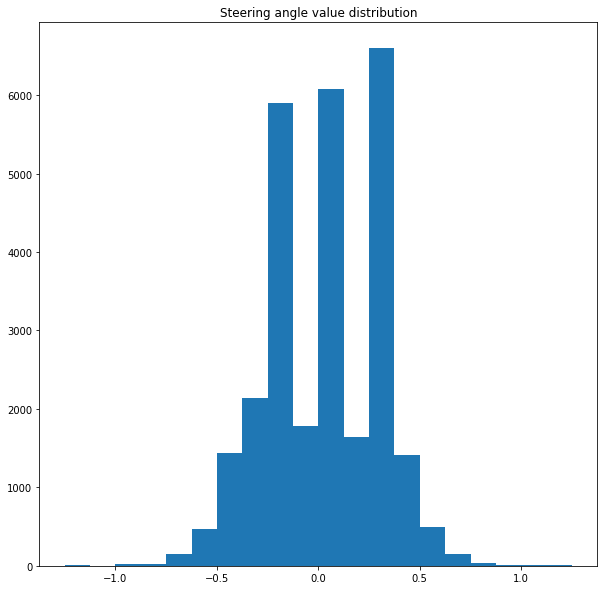

In [43]:
steering_angle_array = np.array(df_with_flipped_images['steering_angle_rounded'])
plt.figure(figsize=(10,10))
plt.hist(steering_angle_array, bins=20)
plt.title("Steering angle value distribution")

In [44]:
len(steering_angle_array)

28358

In [45]:
def noise_images(df_input,df_original):
    
    additive_gaussian_noise = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)
    
    for i in range(len(df_input)):
        
        index = df_input.index[i]
        
        image = str(df_input.loc[index,'image']).strip()
        img = cv2.imread(image)
        
        noisy_img = additive_gaussian_noise.augment_image(img)
        angle = df_input.loc[index,'steering_angle']
        rounded_angle = df_input.loc[index,'steering_angle_rounded']
        
        
        saved_name = str(df_input.loc[index,'image']).strip('jpg').strip('.') + "_" + "noised" + "." + "jpg"
        df_original = df_original.append(pd.DataFrame({"image":[saved_name],"steering_angle":[angle],"steering_angle_rounded":[rounded_angle]}), ignore_index = True)
        cv2.imwrite(saved_name,noisy_img)
        
    return df_original
        

In [46]:
df_with_noise = noise_images(df_large_steering_angles,df_with_flipped_images)

In [47]:
len(df_with_noise)

32608

Text(0.5,1,'Steering angle value distribution')

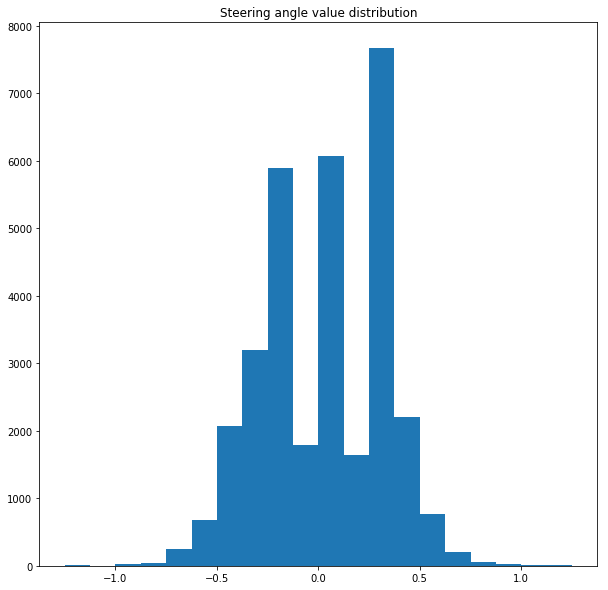

In [48]:
steering_angle_array = np.array(df_with_noise['steering_angle_rounded'])
plt.figure(figsize=(10,10))
plt.hist(steering_angle_array, bins=20)
plt.title("Steering angle value distribution")

In [49]:
def invert_pixels(df_input,df_original):
    
    invert = iaa.Invert(1.0)
    
    for i in range(len(df_input)):
        
        index = df_input.index[i]
        
        image = str(df_input.loc[index,'image']).strip()
        img = cv2.imread(image)
        
        inverted_img = invert.augment_image(img)
        angle = df_input.loc[index,'steering_angle']
        rounded_angle = df_input.loc[index,'steering_angle_rounded']
        
        
        saved_name = str(df_input.loc[index,'image']).strip('jpg').strip('.') + "_" + "inverted" + "." + "jpg"
        df_original = df_original.append(pd.DataFrame({"image":[saved_name],"steering_angle":[angle],"steering_angle_rounded":[rounded_angle]}), ignore_index = True)
        cv2.imwrite(saved_name,inverted_img)
        
    return df_original

In [50]:
df_with_inversion = invert_pixels(df_large_steering_angles,df_with_noise)

Text(0.5,1,'Steering angle value distribution')

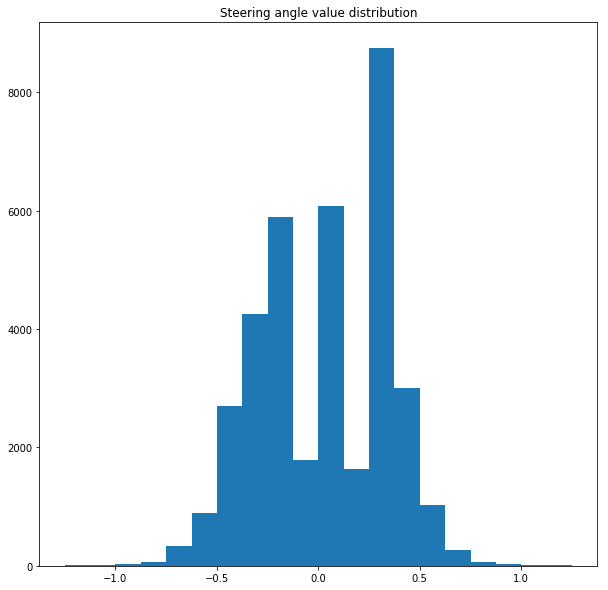

In [51]:
steering_angle_array = np.array(df_with_inversion['steering_angle_rounded'])
plt.figure(figsize=(10,10))
plt.hist(steering_angle_array, bins=20)
plt.title("Steering angle value distribution")

In [52]:
def alter_brightness(df_input,df_original):
    
    bright_dark = iaa.Multiply((0.5, 1.5), per_channel=0.5)
    
    for i in range(len(df_input)):
        
        index = df_input.index[i]
        
        image = str(df_input.loc[index,'image']).strip()
        img = cv2.imread(image)
        
        altered_img = bright_dark.augment_image(img)
        angle = df_input.loc[index,'steering_angle']
        rounded_angle = df_input.loc[index,'steering_angle_rounded']
        
        
        saved_name = str(df_input.loc[index,'image']).strip('jpg').strip('.') + "_" + "bright" + "." + "jpg"
        df_original = df_original.append(pd.DataFrame({"image":[saved_name],"steering_angle":[angle],"steering_angle_rounded":[rounded_angle]}), ignore_index = True)
        cv2.imwrite(saved_name,altered_img)
        
    return df_original

In [53]:
df_with_altered_brightness = alter_brightness(df_large_steering_angles,df_with_inversion)

In [54]:
len(df_with_altered_brightness)

41108

Text(0.5,1,'Steering angle value distribution')

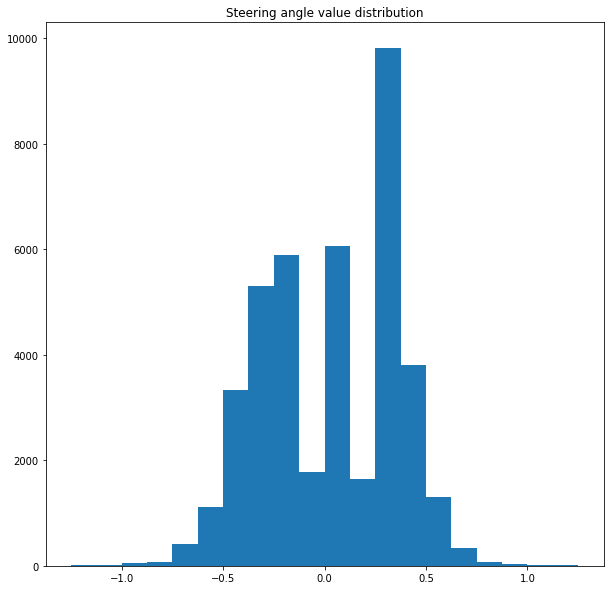

In [55]:
steering_angle_array = np.array(df_with_altered_brightness['steering_angle_rounded'])
plt.figure(figsize=(10,10))
plt.hist(steering_angle_array, bins=20)
plt.title("Steering angle value distribution")

In [56]:
df_with_altered_brightness.to_csv(path_or_buf="./modified_driving_log.csv")

In [58]:
read_file = pd.read_csv("./modified_driving_log.csv")

In [59]:
len(read_file)

41108

In [60]:
from skimage.transform import resize

In [24]:
resized = cv2.resize(img, (224,224))

In [69]:
resized.shape

(224, 224, 3)

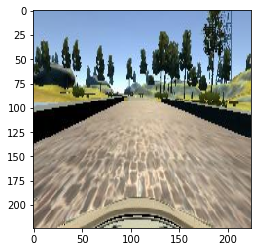

In [70]:
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))

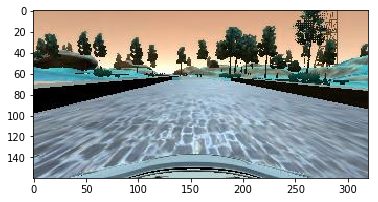

In [65]:
plt.imshow(img)

In [5]:
from keras.applications import DenseNet121
from keras.applications.densenet import preprocess_input

In [30]:
x = preprocess_input(resized)

In [33]:
x.std(axis=0)

array([[1.3084061 , 1.11442   , 1.0732648 ],
       [1.2742127 , 1.0968202 , 1.0570825 ],
       [1.2248886 , 1.0850949 , 1.0672395 ],
       [1.1766931 , 1.0614423 , 1.0802703 ],
       [1.180295  , 1.0709454 , 1.0983566 ],
       [1.2073247 , 1.0977135 , 1.1207467 ],
       [1.1959878 , 1.0939236 , 1.1120068 ],
       [1.1651734 , 1.080375  , 1.1063354 ],
       [1.1437956 , 1.0848063 , 1.12925   ],
       [1.1466509 , 1.0898862 , 1.1481384 ],
       [1.1291867 , 1.0755385 , 1.1367545 ],
       [1.1430078 , 1.0747094 , 1.1299597 ],
       [1.1523734 , 1.0673114 , 1.1264026 ],
       [1.1621572 , 1.0746472 , 1.1377113 ],
       [1.159168  , 1.0692682 , 1.135469  ],
       [1.1583171 , 1.0660017 , 1.12019   ],
       [1.206319  , 1.0906098 , 1.1172086 ],
       [1.1986239 , 1.0635303 , 1.0696305 ],
       [1.2186892 , 1.0606798 , 1.0572784 ],
       [1.1948316 , 1.0413787 , 1.0422455 ],
       [1.1909616 , 1.0536301 , 1.0737605 ],
       [1.1819556 , 1.0314459 , 1.0537157 ],
       [1.

In [1]:
import tensorflow

/home/hmodea/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hmodea/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hmodea/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hmodea/anaconda3/envs/car

In [2]:
tensorflow.__version__

'1.14.0'

In [3]:
import keras

Using TensorFlow backend.
